# Intro

ref: https://dev.to/dmitryzub/scrape-google-scholar-with-python-32oh 

In [ ]:
# pip install requests
# pip install lxml 
# pip install beautifulsoup4
# pip install google-search-results 

# Import Libraries

In [47]:
from bs4 import BeautifulSoup
import requests, lxml, os, json
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Headers & Parameters

In [57]:
headers = {
    'User-agent':
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582"
}

params = {
  "q": "credit card fraud",
  "hl": "en",
}

html = requests.get('https://scholar.google.com/scholar?start=0', headers=headers, params=params).text
soup = BeautifulSoup(html, 'lxml')

# Web Scraping

We find out how many search results there are and we get the number pages we could cycle through.

In [58]:
def pagination(s):
  txt = ""
  for result in s.select('.gs_ab_mdw'):
    txt = ''.join(result.text)
  print(txt)
  x = re.search("(\d+,\d+)", txt)
  x = x[0]
  x = x.replace(',', '')
  x = int(x)
  y = x / 10
  return y
pages = pagination(soup)

About 124,000 results (0.03 sec)


## Scrape just PDF links

In [59]:
# Scrape just PDF links
for pdf_link in soup.select('.gs_or_ggsm a'):
  pdf_file_link = pdf_link['href']
  print(pdf_file_link)

https://www.academia.edu/download/50465302/Data_mining_for_credit_card_fraud_A_comp20161121-25369-10r6y8m.pdf
https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.1056.6194&rep=rep1&type=pdf
https://www.aaai.org/Papers/KDD/1998/KDD98-026.pdf
http://eprints.hud.ac.uk/19069/1/AbdouCredit.pdf
https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.660.7301&rep=rep1&type=pdf
http://euro.ecom.cmu.edu/resources/elibrary/epay/1-s2.0-S095741741400089X-main.pdf
https://www.researchgate.net/profile/Yaochen-Deng/publication/4265092_Application_of_Classification_Models_on_Credit_Card_Fraud_Detection/links/56dea95608aedf2bf0c9c07e/Application-of-Classification-Models-on-Credit-Card-Fraud-Detection.pdf
https://www.researchgate.net/profile/Karl-Tuyls/publication/254198382_Machine_Learning_Techniques_for_Fraud_Detection/links/555f695508ae6f4dcc926e88/Machine-Learning-Techniques-for-Fraud-Detection.pdf
https://www.academia.edu/download/25945093/ictai99.pdf


In [68]:
# JSON data will be collected here
data = []
text = ""

# Container where all needed data is located
for result in soup.select('.gs_ri'):
  title = result.select_one('.gs_rt').text
  title_link = result.select_one('.gs_rt a')['href']
  publication_info = result.select_one('.gs_a').text
  snippet = result.select_one('.gs_rs').text
  cited_by = result.select_one("a[href*=/scholar?cites=]").text #result.select_one('#gs_res_ccl_mid .gs_nph a')['href']
  related_articles = result.select_one("a[href*=/scholar?q=related=]") #result.select_one('a:nth-child(4)')['href'] 
  try:
    all_article_versions = result.select_one('a~ a+ .gs_nph')['href']
  except:
    all_article_versions = None

  data.append({
    'title': title,
    'title_link': title_link,
    'publication_info': publication_info,
    'snippet': snippet,
    'cited_by': f'https://scholar.google.com{cited_by}',
    'related_articles': f'https://scholar.google.com{related_articles}',
    'all_article_versions': f'https://scholar.google.com{all_article_versions}',
  })
  text += " " + title

#print(json.dumps(data, indent = 2, ensure_ascii = False))
print(text)

 Data mining for credit card fraud: A comparative study Analysis on credit card fraud detection methods Credit card fraud detection with a neural-network Distributed data mining in credit card fraud detection [PDF][PDF] Credit card fraud and detection techniques: a review Credit card fraud detection using hidden Markov model Learned lessons in credit card fraud detection from a practitioner perspective Application of classification models on credit card fraud detection [PDF][PDF] Credit card fraud detection using Bayesian and neural networks Neural data mining for credit card fraud detection


# Wordcloud

## Tokenise the words

In [69]:
tokens = []

tokens = word_tokenize(text)

print('Number of Tokens =',len(tokens))

Number of Tokens = 98


## Filter words, remove numbers & Punctuation

In [70]:
#converts to lower case, and removes punctuation and numbers
wordsFiltered = [tokens.lower() for tokens in tokens if tokens.isalpha()]
print(len(wordsFiltered))
print(wordsFiltered)

87
['data', 'mining', 'for', 'credit', 'card', 'fraud', 'a', 'comparative', 'study', 'analysis', 'on', 'credit', 'card', 'fraud', 'detection', 'methods', 'credit', 'card', 'fraud', 'detection', 'with', 'a', 'distributed', 'data', 'mining', 'in', 'credit', 'card', 'fraud', 'detection', 'pdf', 'pdf', 'credit', 'card', 'fraud', 'and', 'detection', 'techniques', 'a', 'review', 'credit', 'card', 'fraud', 'detection', 'using', 'hidden', 'markov', 'model', 'learned', 'lessons', 'in', 'credit', 'card', 'fraud', 'detection', 'from', 'a', 'practitioner', 'perspective', 'application', 'of', 'classification', 'models', 'on', 'credit', 'card', 'fraud', 'detection', 'pdf', 'pdf', 'credit', 'card', 'fraud', 'detection', 'using', 'bayesian', 'and', 'neural', 'networks', 'neural', 'data', 'mining', 'for', 'credit', 'card', 'fraud', 'detection']


## Stopword setup

In [71]:
#We initialize the stopwords variable which is a list of words like 
#"The", "I", "and", etc. that don't hold much value as keywords
stop_words = stopwords.words('english')
print(stop_words)

#some extra stop words are needed after examining the data and word cloud
#these are added
extra_stop_words = ['ireland','irish','ł','need', 'also', 'set', 'within', 'use', 'order', 'would', 'year', 'per', 'time', 'place', 'must', 'years', 'much', 'take','make','making','manifesto','ð','u','part','needs','next','keep','election', 'fine','gael', 'gaelgeneral', 'fianna', 'fáil','fail','labour', 'sinn', 'fein','féin','atá','go','le','ar','agus','na','ár','ag','haghaidh','téarnamh','bplean','page','two','number','cothromfor']
stop_words.extend(extra_stop_words)
print(stop_words)

# remove stop words from tokenised data set
filtered_words = [word for word in wordsFiltered if word not in stop_words]
print(len(filtered_words))
print(filtered_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## word frequency counts

In [72]:
#get the frequency of each word
from collections import Counter

# count frequencies
cnt = Counter()
for word in filtered_words:
  cnt[word] += 1

print(cnt)

Counter({'credit': 10, 'card': 10, 'fraud': 10, 'detection': 9, 'pdf': 4, 'data': 3, 'mining': 3, 'using': 2, 'neural': 2, 'comparative': 1, 'study': 1, 'analysis': 1, 'methods': 1, 'distributed': 1, 'techniques': 1, 'review': 1, 'hidden': 1, 'markov': 1, 'model': 1, 'learned': 1, 'lessons': 1, 'practitioner': 1, 'perspective': 1, 'application': 1, 'classification': 1, 'models': 1, 'bayesian': 1, 'networks': 1})


## WordCloud image

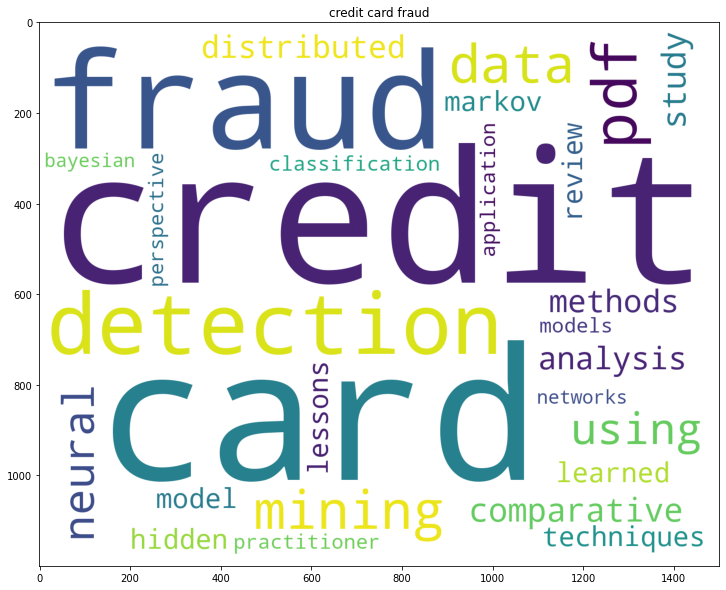

In [74]:
#create a word cloud using frequencies for emphasis 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(max_words=100, margin=9, background_color='white',
scale=3, relative_scaling = 0.5, width=500, height=400,
random_state=1).generate_from_frequencies(cnt)

plt.figure(figsize=(20,10))
plt.title(params['q'])
plt.imshow(wc)
#plt.axis("off")
plt.show()

#Save the image in the img folder:
#wc.to_file(wkDir+party+"_2016.png")